## **Group ID : PTID-CDS-NOV-25-3422**
## 
**Project ID : PRCP-1016-HeartDieseasePred**

**All the useful information is present in two dataframes with ‘patient_id’ being the common column. So as the first step, you need to merge these two data files so that you have all the useful data combined into a single master dataframe.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
values = pd.read_csv("values.csv")
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
labels = pd.read_csv("labels.csv")
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


#### Combining all data files into one consolidated dataframe

In [4]:
# Merge the two dataframes on 'patient_id'
df = pd.merge(values, labels, how='inner', on='patient_id')
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [5]:
df.shape

(180, 15)

In [6]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [8]:
# Drop the 'patient_id' column as it is not needed for analysis
df.drop(['patient_id'], axis=1, inplace=True)
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [9]:
# Check for missing values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
# Check for duplicate rows
df.duplicated().sum()

0

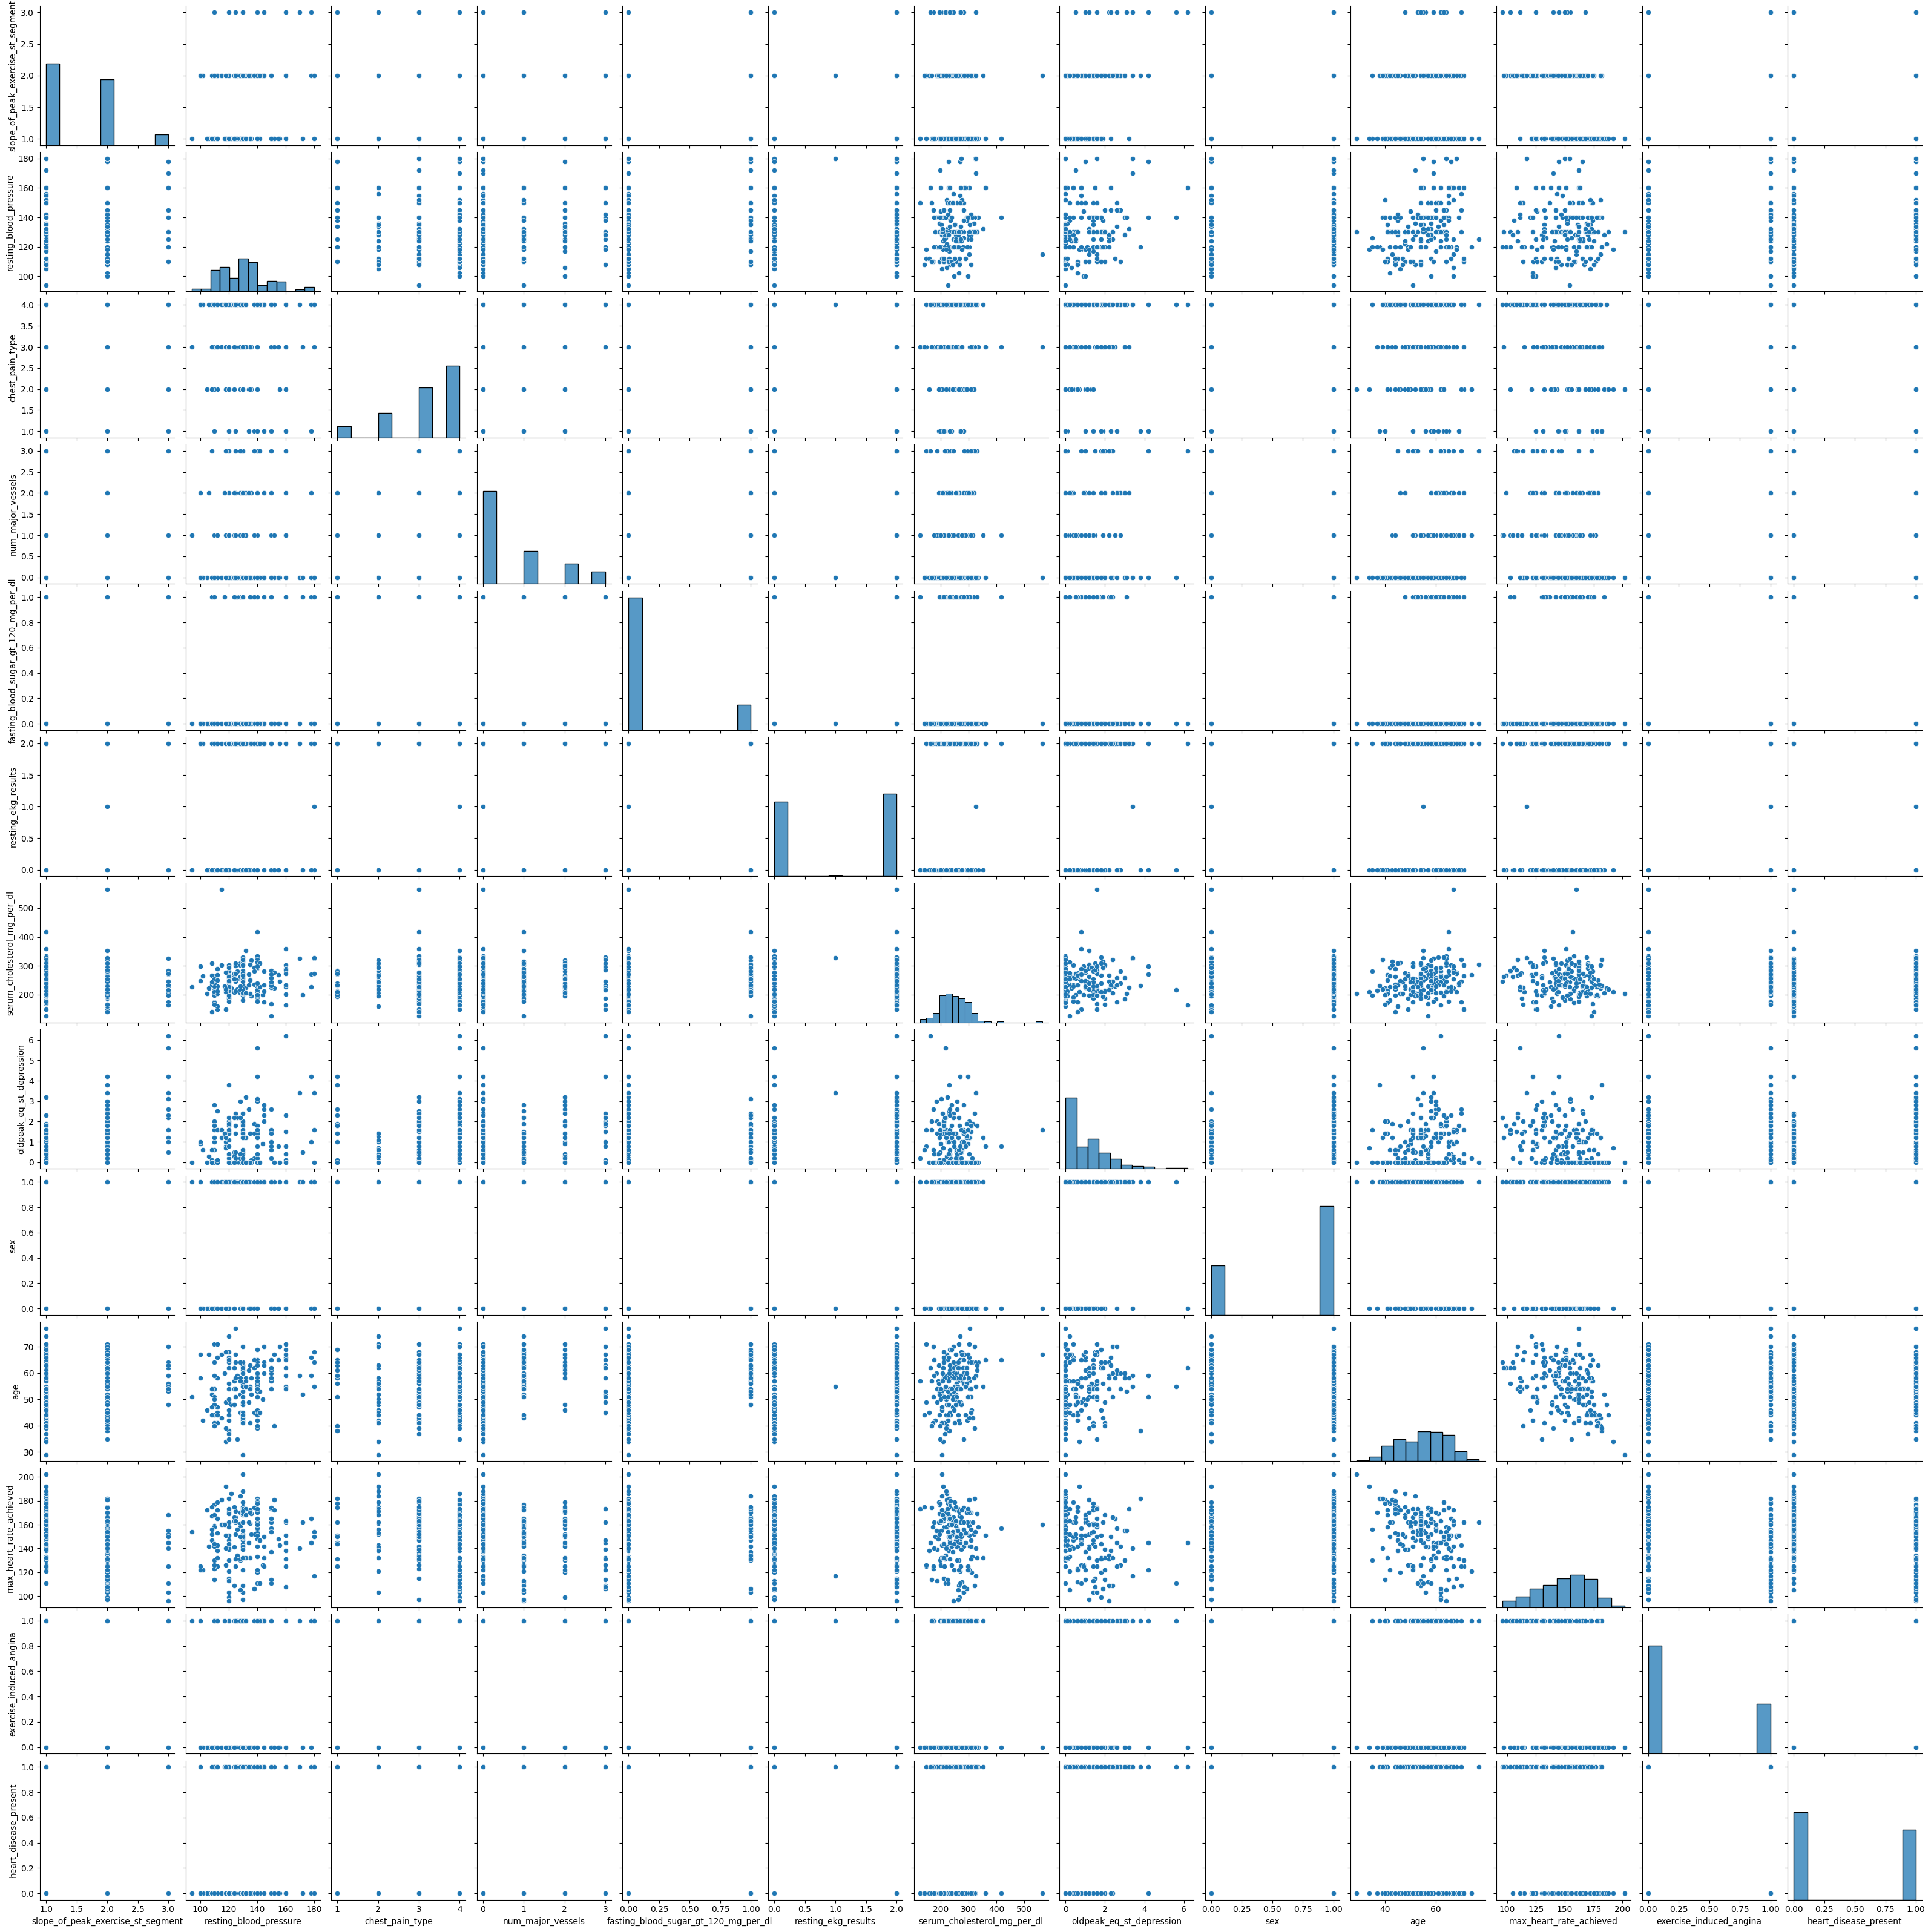

In [11]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='thal', ylabel='heart_disease_present'>

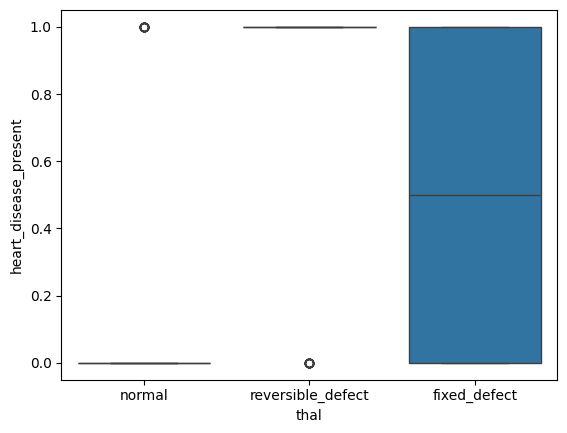

In [12]:
# Boxplot of 'thal' vs 'heart_disease_present'
sns.boxplot(x='thal', y='heart_disease_present', data=df)

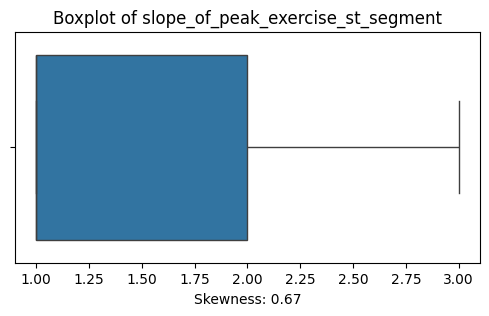

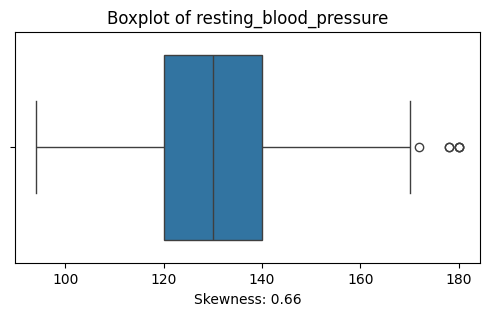

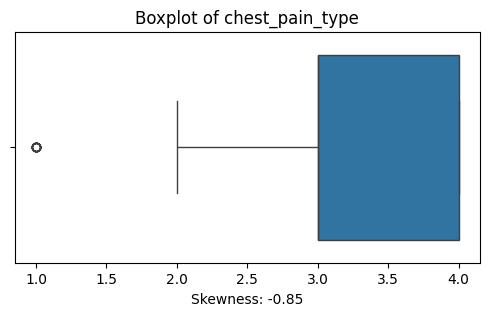

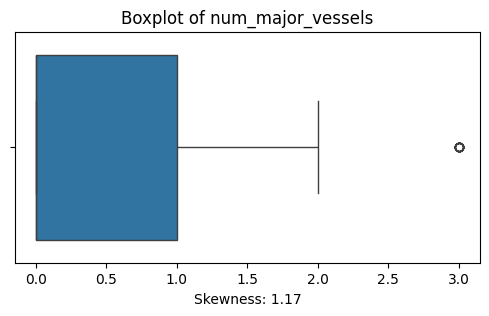

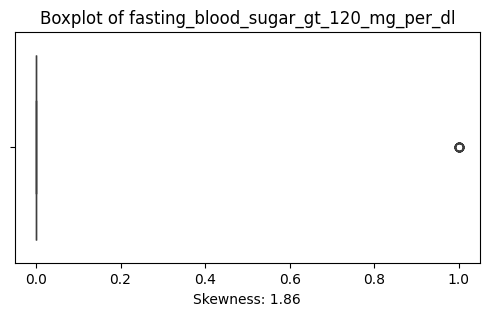

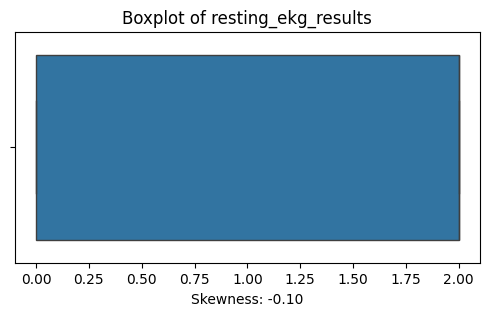

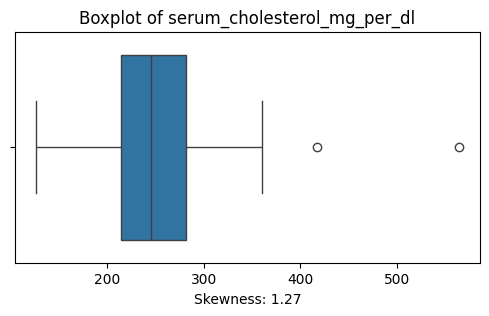

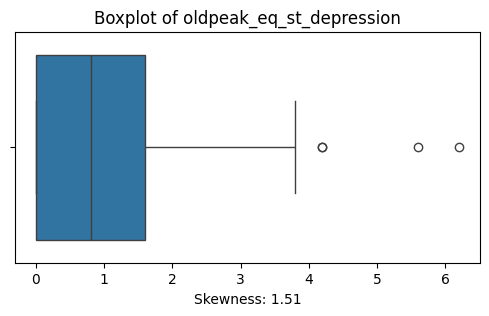

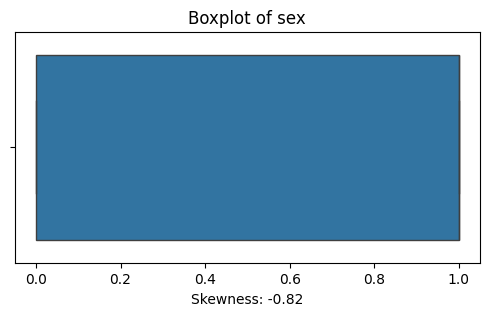

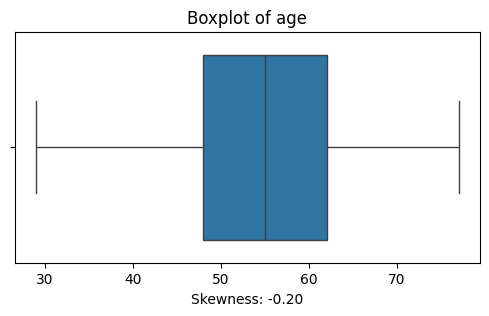

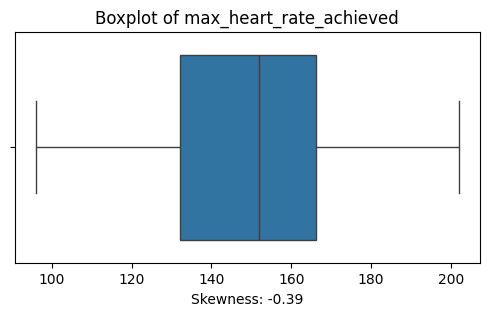

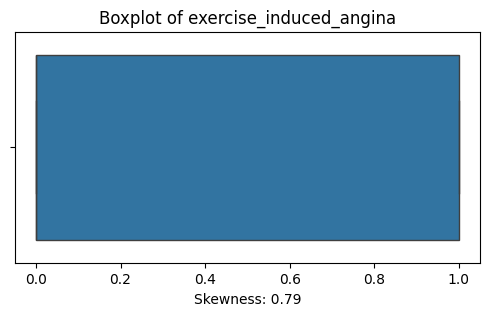

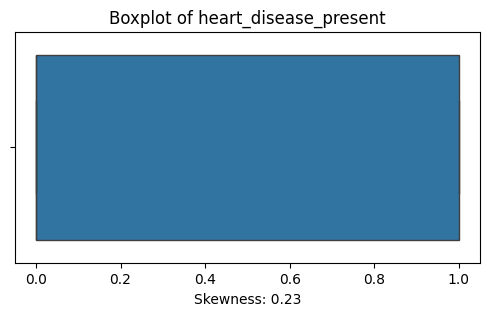

In [13]:
# Visualize distributions and skewness of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    skewness = df[col].skew()
    plt.xlabel(f'Skewness: {skewness:.2f}')
    plt.show()

In [14]:
# Calculate skewness for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

skewness = df[numeric_cols].skew().sort_values(ascending=False)

print("Skewness of Numeric Columns:")
print(skewness)

Skewness of Numeric Columns:
fasting_blood_sugar_gt_120_mg_per_dl    1.859153
oldpeak_eq_st_depression                1.507412
serum_cholesterol_mg_per_dl             1.273932
num_major_vessels                       1.167999
exercise_induced_angina                 0.794871
slope_of_peak_exercise_st_segment       0.666150
resting_blood_pressure                  0.657080
heart_disease_present                   0.225490
resting_ekg_results                    -0.100967
age                                    -0.199166
max_heart_rate_achieved                -0.393705
sex                                    -0.822900
chest_pain_type                        -0.849258
dtype: float64


In [15]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

print("Categorical Columns:\n", (categorical_cols))
print("\nNumerical Columns:\n", numerical_cols)

Categorical Columns:
 Index(['thal'], dtype='object')

Numerical Columns:
 Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')


In [16]:
df['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [17]:
# Encoding 'thal' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['thal'] = le.fit_transform(df['thal'])
df['thal'].unique()

array([1, 2, 0])

In [18]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [19]:
df['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

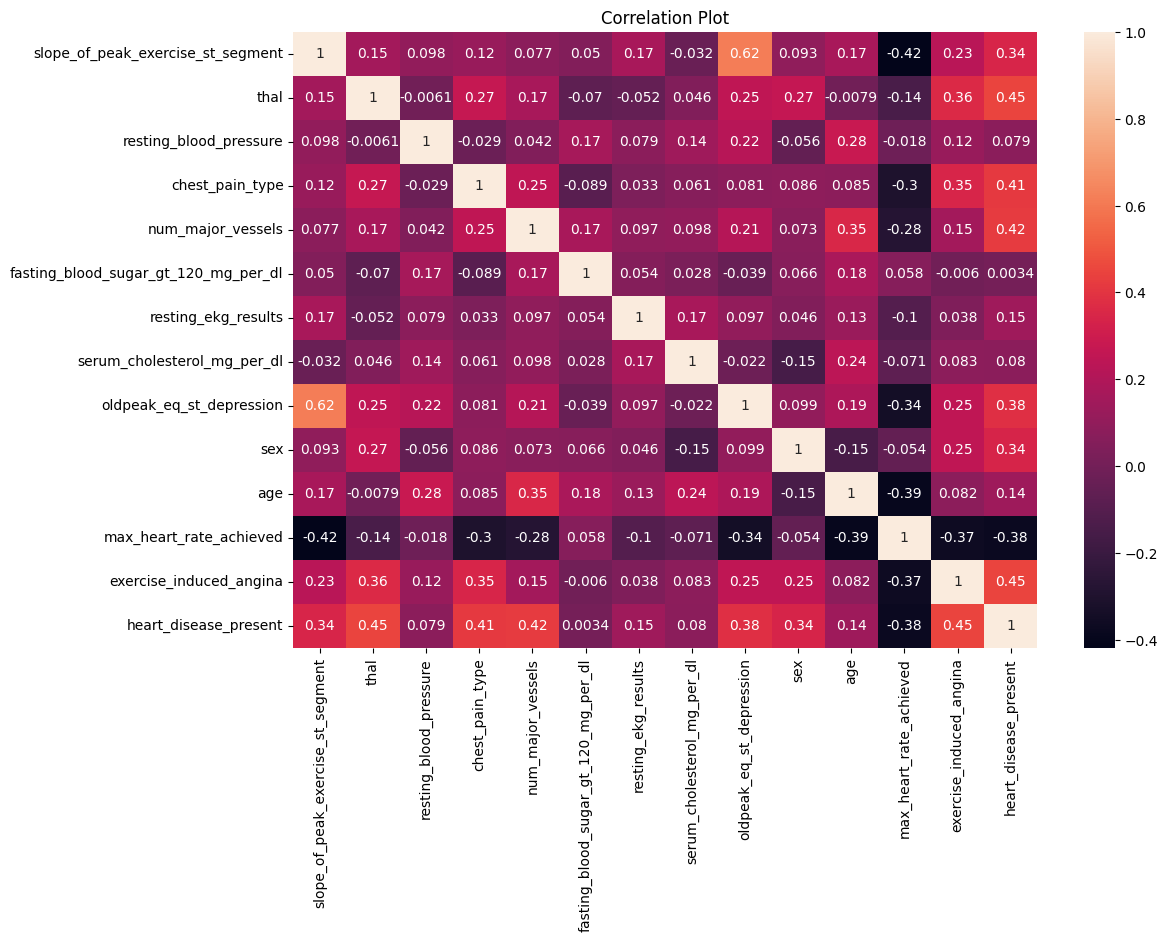

In [20]:
# Correlation plot
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Plot')
plt.show()

In [21]:
try:
    from ydata_profiling import ProfileReport
    report = ProfileReport(df, title="EDA", explorative=False)
    # Display inline in notebook if environment supports it
    try:
        report.to_notebook_iframe()
    except Exception:
        print("ProfileReport generated (not displayed inline).")
except Exception as e:
    print("ydata_profiling not available or failed to run:", e)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 200.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Splitting features and target variable
X = df.drop('heart_disease_present', axis=1)
y = df['heart_disease_present']

In [23]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
# Calculate percentage of patients with heart disease
heart = (sum(df['heart_disease_present']) / len(df['heart_disease_present'].index)) * 100
heart

44.44444444444444

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.8333333333333334
ROC AUC: 0.940625
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.78      0.88      0.82        16

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36

Confusion Matrix:
 [[16  4]
 [ 2 14]]


# Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

# Use the resampled and scaled training data
svm = SVC(probability=True, kernel='rbf', random_state=42)
svm.fit(X_train_res, y_train_res)
y_pred_svm = svm.predict(X_test_scaled)

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, y_pred_svm))



Support Vector Machine:
Accuracy: 0.8055555555555556
ROC AUC: 0.940625
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.74      0.88      0.80        16

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test_scaled)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.7777777777777778
ROC AUC: 0.78125
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.72      0.81      0.76        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36

Confusion Matrix:
 [[15  5]
 [ 3 13]]


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n",
       confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.8333333333333334
ROC AUC: 0.9468749999999999
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

Confusion Matrix:
 [[15  5]
 [ 1 15]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rfc_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rfc_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rfc_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42
)

rfc_random.fit(X_train_res, y_train_res)
best_rfc = rfc_random.best_estimator_

y_pred_rfc = best_rfc.predict(X_test_scaled)
y_prob_rfc = best_rfc.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest (After RandomizedSearchCV Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rfc))
print(classification_report(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))


Random Forest (After RandomizedSearchCV Tuning):
Accuracy: 0.9166666666666666
ROC AUC: 0.9562499999999999
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36

Confusion Matrix:
 [[17  3]
 [ 0 16]]


# Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
gb.fit(X_train_res, y_train_res)
y_pred_gb = gb.predict(X_test_scaled)

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, gb.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier:
Accuracy: 0.9166666666666666
ROC AUC: 0.934375
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36

Confusion Matrix:
 [[17  3]
 [ 0 16]]


In [33]:
# Hyperparameter Tuning for Gradient Boosting Classifier using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Parameter Distributions (faster search)
gbc_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.7, 0.3),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Model
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

# Randomized Search
gbc_random = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=gbc_dist,
    n_iter=50,              # number of random combinations
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit
gbc_random.fit(X_train_res, y_train_res)

# Best parameters
print("\nBest Hyperparameters:")
print(gbc_random.best_params_)

# Best model
best_gbc = gbc_random.best_estimator_

# Predictions
y_pred_gbc = best_gbc.predict(X_test_scaled)
y_prob_gbc = best_gbc.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nGradient Boosting (After RandomizedSearchCV Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("ROC AUC:", roc_auc_score(y_test, y_prob_gbc))
print(classification_report(y_test, y_pred_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters:
{'learning_rate': 0.043658208434586114, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 279, 'subsample': 0.8090888807137881}

Gradient Boosting (After RandomizedSearchCV Tuning):
Accuracy: 0.9166666666666666
ROC AUC: 0.95625
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36

Confusion Matrix:
 [[17  3]
 [ 0 16]]


# XGBoost

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test_scaled)

print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.8611111111111112
ROC AUC: 0.934375
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.79      0.94      0.86        16

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36

Confusion Matrix:
 [[16  4]
 [ 1 15]]


In [35]:
# Displaying Actual vs Predicted for the best Gradient Boosting Classifier
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gbc
})

result['Match'] = result['Actual'] == result['Predicted']

display(result)

,Actual,Predicted,Match
24,0,0,True
173,1,1,True
81,1,1,True
160,0,0,True
35,0,0,True
147,1,1,True
33,0,1,False
126,0,0,True
4,0,1,False
57,1,1,True


In [36]:
# Save the trained model and preprocessing artifacts as a pipeline dict
import pickle

# Locate a trained model object in the notebook namespace
model_obj = None
for name in ('best_gbc', 'gb', 'best_rfc', 'rf', 'xgb'):
    if name in globals():
        model_obj = globals()[name]
        break

if model_obj is None:
    raise RuntimeError('No trained model object found. Run training/tuning cells before saving.')

scaler_obj = globals().get('scaler')
le_obj = globals().get('le')
feature_order = None
if 'X' in globals() and hasattr(globals()['X'], 'columns'):
    try:
        feature_order = globals()['X'].columns.tolist()
    except Exception:
        feature_order = None

pipeline = {
    'model': model_obj,
    'scaler': scaler_obj,
    'label_encoder': le_obj,
    'feature_order': feature_order
}

with open('model.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

print('Saved pipeline to model.pkl')


Saved pipeline to model.pkl
